# BSNL Mobile Traffic Analysis¶

## Objective :

## 1. 3G Data Traffic Analysis

## 2. Predicting DATA Volume

In [2]:
# Importing Required Librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Collection

In [113]:
'''
pd.read_csv()
pd.read_excel()
pd.read_html()
pd.read_json()
pd.read_sql()

'''

# Importing Data Set of 2G Voice Traffic

df3g = pd.read_csv('NSN_KPI_REPORT_111018_3g.csv')

## 2. Data Cleaning

In [114]:
'''
df.head()
df.shape
df.info()
df.columns
df.drop()
df.describe()
df.isnull()
df.fillna()
df.dropna()
df.replace()
'''
# Displaying 1st 5 Records in the Data Set

df3g.head()

,Period start time,PLMN name,RNC name,WBTS name,WBTS ID,WCEL name,WCEL ID,RRC Connection Success rate (%),RRC Connection Setup Completed,RRC Setup Attempts,...,Active HS-DSCH cell thr,Upload Data,Download Data,TOTAL DATA,Active HSUPA cell thp,UDI Call Setup Success Ratio (CSSR),Video_DCR,PS Congestion due to CE 3G,PS Congestion due to IUB 3G,PS Congestion due to Power 3G
0,11-10-18,PLMN,RNC_AP_N_RNC553_TRP,553_351_Nakkaladinne _CT5501,635,553_36352_Nakkaladinne _CT5501,36352,100.0,7144.0,7144.0,...,4343.75,1.054043,15.351885,16.405928,123.370,NaN,NaN,0.01,0.0,0.0
1,11-10-18,PLMN,RNC_AP_N_RNC553_TRP,553_351_Nakkaladinne _CT5501,635,553_36353_Nakkaladinne _CT5501,36353,100.0,5513.0,5513.0,...,3966.10,0.446504,5.524326,5.970830,66.906,100.0,0.0,0.01,0.0,0.0
2,11-10-18,PLMN,RNC_AP_N_RNC553_TRP,553_351_Nakkaladinne _CT5501,635,553_36351_Nakkaladinne _CT5501,36351,100.0,6557.0,6557.0,...,3631.89,1.317627,7.894961,9.212588,163.319,NaN,NaN,0.00,0.0,0.0
3,11-10-18,PLMN,RNC_AP_N_RNC553_TRP,553_3640_CTR_Puttur_CT2065,640,553_36401_CTR_Puttur_CT2065,36401,100.0,18594.0,18594.0,...,4468.84,1.935928,26.312852,28.248779,217.949,100.0,0.0,0.00,0.0,0.0
4,11-10-18,PLMN,RNC_AP_N_RNC553_TRP,553_3640_CTR_Puttur_CT2065,640,553_36402_CTR_Puttur_CT2065,36402,100.0,12945.0,12945.0,...,4045.29,3.236270,23.843105,27.079375,365.802,NaN,NaN,0.00,0.0,0.0


In [115]:
# Shape of the data set

df3g.shape

(582, 59)

In [116]:
# Information about Data Set,no.of Rows, no.of Columns, Column names and its Data Types

# Observe whether no of rows are equal in all columns or not...
# if no.of rows are not equal then there might be null values that need to be addressed

df3g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 59 columns):
Period start time                             582 non-null object
PLMN name                                     582 non-null object
RNC name                                      582 non-null object
WBTS name                                     582 non-null object
WBTS ID                                       582 non-null int64
WCEL name                                     582 non-null object
WCEL ID                                       582 non-null int64
RRC Connection Success rate (%)               576 non-null float64
RRC Connection Setup Completed                576 non-null float64
RRC Setup Attempts                            576 non-null float64
CS RAB Setup Success Rate                     576 non-null float64
RAB setup completed for CS Voice calls        576 non-null float64
RAB Attempts CS Voice                         576 non-null float64
R99 stp SR Usr                   

In [117]:
# Displaying column names

df3g.columns

Index(['Period start time', 'PLMN name', 'RNC name', 'WBTS name', 'WBTS ID',
       'WCEL name', 'WCEL ID', 'RRC Connection Success rate (%)',
       'RRC Connection Setup Completed', 'RRC Setup Attempts',
       'CS RAB Setup Success Rate', 'RAB setup completed for CS Voice calls',
       'RAB Attempts CS Voice', 'R99 stp SR Usr', 'R99_Rab_Succ',
       'R99_Rab_Attempts', 'HSDPA stp SR Usr', 'HSDPA Succ', 'HSDPA att',
       'HSUPA stp SR Usr', 'HSUPA_Rab_Success', 'HSUPA_Rab_Attempts',
       'Voice_DCR', 'CS RAB Drop Nom', 'CS_Rab_Release', 'R99 PS Drop Rate',
       'R99 Drop Count', 'R99_Release_Count', 'HSDPA Call Drop Rate (%)',
       'HSDPA Call Drop', 'HSDPA Call Release', 'HSUPA Call Drop Rate (%)',
       'HSUPA Call Drop', 'HSUPA Call Release', 'Soft HO Success rate, RT',
       'succ_updates_on_sho_for_rt (M1007C15)', 'Soft HO Update Attempts, RT',
       'Inter sys RT Hard HO SR', 'RT IRAT Success Count',
       'RT IRAT Attempts count', 'Inter sys NRT Hard HO SR',
    

In [118]:
# Choosing only useful columns 

df3gmod = df3g[['WBTS name','WCEL name','RAB setup completed for CS Voice calls','RAB Attempts CS Voice',
                'HSDPA Succ','HSDPA att','HSUPA_Rab_Success','HSUPA_Rab_Attempts','Voice_DCR','HSDPA Call Drop Rate (%)',
               'HSDPA Call Drop','HSDPA Call Release','HSUPA Call Drop Rate (%)', 'HSUPA Call Drop', 'HSUPA Call Release',
               'Upload Data','Download Data','TOTAL DATA']]

In [119]:
df3gmod.head()

,WBTS name,WCEL name,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
0,553_351_Nakkaladinne _CT5501,553_36352_Nakkaladinne _CT5501,1856.0,1856.0,27548.0,27706.0,27548.0,27697.0,0.05,0.53,168.0,31908.0,0.62,182.0,29210.0,1.054043,15.351885,16.405928
1,553_351_Nakkaladinne _CT5501,553_36353_Nakkaladinne _CT5501,1556.0,1556.0,15812.0,15877.0,15808.0,15872.0,0.13,0.87,159.0,18297.0,1.04,173.0,16602.0,0.446504,5.524326,5.970830
2,553_351_Nakkaladinne _CT5501,553_36351_Nakkaladinne _CT5501,1827.0,1827.0,22778.0,22948.0,22778.0,22939.0,0.11,0.62,167.0,27077.0,0.81,199.0,24464.0,1.317627,7.894961,9.212588
3,553_3640_CTR_Puttur_CT2065,553_36401_CTR_Puttur_CT2065,3026.0,3026.0,53545.0,53906.0,53347.0,53673.0,0.19,0.41,269.0,65344.0,0.52,303.0,58624.0,1.935928,26.312852,28.248779
4,553_3640_CTR_Puttur_CT2065,553_36402_CTR_Puttur_CT2065,3203.0,3203.0,41549.0,41926.0,41544.0,41849.0,0.27,0.74,395.0,53302.0,0.92,430.0,46988.0,3.236270,23.843105,27.079375


In [120]:
df3gmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 18 columns):
WBTS name                                 582 non-null object
WCEL name                                 582 non-null object
RAB setup completed for CS Voice calls    576 non-null float64
RAB Attempts CS Voice                     576 non-null float64
HSDPA Succ                                575 non-null float64
HSDPA att                                 575 non-null float64
HSUPA_Rab_Success                         575 non-null float64
HSUPA_Rab_Attempts                        575 non-null float64
Voice_DCR                                 575 non-null float64
HSDPA Call Drop Rate (%)                  575 non-null float64
HSDPA Call Drop                           575 non-null float64
HSDPA Call Release                        575 non-null float64
HSUPA Call Drop Rate (%)                  572 non-null float64
HSUPA Call Drop                           575 non-null float64
HSUPA Call Rele

In [121]:
# Check for null values

df3gmod.isnull()

,WBTS name,WCEL name,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
# Drop rows having null values

df3gmod.dropna(inplace = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
df3gmod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 578
Data columns (total 18 columns):
WBTS name                                 572 non-null object
WCEL name                                 572 non-null object
RAB setup completed for CS Voice calls    572 non-null float64
RAB Attempts CS Voice                     572 non-null float64
HSDPA Succ                                572 non-null float64
HSDPA att                                 572 non-null float64
HSUPA_Rab_Success                         572 non-null float64
HSUPA_Rab_Attempts                        572 non-null float64
Voice_DCR                                 572 non-null float64
HSDPA Call Drop Rate (%)                  572 non-null float64
HSDPA Call Drop                           572 non-null float64
HSDPA Call Release                        572 non-null float64
HSUPA Call Drop Rate (%)                  572 non-null float64
HSUPA Call Drop                           572 non-null float64
HSUPA Call Rele

In [124]:
# Diplay 1st 5 rows of DF after Data Cleaning

df3gmod.head()

,WBTS name,WCEL name,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
0,553_351_Nakkaladinne _CT5501,553_36352_Nakkaladinne _CT5501,1856.0,1856.0,27548.0,27706.0,27548.0,27697.0,0.05,0.53,168.0,31908.0,0.62,182.0,29210.0,1.054043,15.351885,16.405928
1,553_351_Nakkaladinne _CT5501,553_36353_Nakkaladinne _CT5501,1556.0,1556.0,15812.0,15877.0,15808.0,15872.0,0.13,0.87,159.0,18297.0,1.04,173.0,16602.0,0.446504,5.524326,5.970830
2,553_351_Nakkaladinne _CT5501,553_36351_Nakkaladinne _CT5501,1827.0,1827.0,22778.0,22948.0,22778.0,22939.0,0.11,0.62,167.0,27077.0,0.81,199.0,24464.0,1.317627,7.894961,9.212588
3,553_3640_CTR_Puttur_CT2065,553_36401_CTR_Puttur_CT2065,3026.0,3026.0,53545.0,53906.0,53347.0,53673.0,0.19,0.41,269.0,65344.0,0.52,303.0,58624.0,1.935928,26.312852,28.248779
4,553_3640_CTR_Puttur_CT2065,553_36402_CTR_Puttur_CT2065,3203.0,3203.0,41549.0,41926.0,41544.0,41849.0,0.27,0.74,395.0,53302.0,0.92,430.0,46988.0,3.236270,23.843105,27.079375


## 3. Data Analysis & Visualisation

In [125]:
# Describe DF

df3gmod.describe()

,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,2428.791958,2429.326923,32013.166084,32362.256993,31933.687063,32269.204545,0.482010,0.753794,217.274476,36807.898601,0.902010,241.933566,33916.896853,1.440896,13.349494,14.790391
std,2064.861679,2065.843831,23057.384790,23432.859086,23002.156003,23367.651179,0.889962,0.724469,180.849222,26244.665983,0.835994,205.971235,24459.373259,1.163990,9.106980,10.131463
min,32.000000,32.000000,563.000000,563.000000,563.000000,563.000000,0.000000,0.000000,0.000000,607.000000,0.120000,1.000000,556.000000,0.015391,0.109180,0.124570
25%,928.500000,928.500000,13621.250000,13716.750000,13619.250000,13699.500000,0.150000,0.377500,91.750000,16338.000000,0.450000,100.750000,14567.500000,0.525405,5.753037,6.302678
50%,1765.500000,1765.500000,26748.500000,26934.500000,26695.000000,26905.500000,0.300000,0.550000,175.000000,31024.000000,0.660000,195.000000,28456.000000,1.183706,11.826743,13.117290
75%,3343.000000,3343.000000,46386.750000,46666.500000,46355.500000,46635.500000,0.520000,0.880000,292.000000,52777.000000,1.040000,323.500000,48886.750000,2.068398,19.470305,21.635903
max,12314.000000,12333.000000,112658.000000,113759.000000,112653.000000,113726.000000,9.910000,7.120000,1823.000000,126858.000000,7.340000,2060.000000,119333.000000,9.062568,45.112471,50.892471


In [126]:
# Finding Cell site which is having maximum Data Traffic

df3gmod[df3gmod['TOTAL DATA'] == df3gmod['TOTAL DATA'].max()]

,WBTS name,WCEL name,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
104,553_4551_VIDYANAGAR_NL2152,553_45513_VIDYANAGAR_NL2152,1955.0,1955.0,66647.0,67592.0,66634.0,67591.0,0.78,2.03,1400.0,68996.0,2.54,1706.0,67127.0,5.78,45.112471,50.892471


In [127]:
# Finding Cell site which is having minimum Data Traffic

df3gmod[df3gmod['TOTAL DATA'] == df3gmod['TOTAL DATA'].min()]

,WBTS name,WCEL name,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
377,553_564_GNKandrigaUSO_CT2173,553_35642_GNKandrigaUSO_CT2173,135.0,135.0,563.0,563.0,563.0,563.0,0.77,0.16,1.0,607.0,0.18,1.0,564.0,0.015391,0.10918,0.12457


In [128]:
df3gmod.set_index('WCEL name',inplace = True) 
df3gmod.head()

,WBTS name,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data,TOTAL DATA
WCEL name,,,,,,,,,,,,,,,,,
553_36352_Nakkaladinne _CT5501,553_351_Nakkaladinne _CT5501,1856.0,1856.0,27548.0,27706.0,27548.0,27697.0,0.05,0.53,168.0,31908.0,0.62,182.0,29210.0,1.054043,15.351885,16.405928
553_36353_Nakkaladinne _CT5501,553_351_Nakkaladinne _CT5501,1556.0,1556.0,15812.0,15877.0,15808.0,15872.0,0.13,0.87,159.0,18297.0,1.04,173.0,16602.0,0.446504,5.524326,5.970830
553_36351_Nakkaladinne _CT5501,553_351_Nakkaladinne _CT5501,1827.0,1827.0,22778.0,22948.0,22778.0,22939.0,0.11,0.62,167.0,27077.0,0.81,199.0,24464.0,1.317627,7.894961,9.212588
553_36401_CTR_Puttur_CT2065,553_3640_CTR_Puttur_CT2065,3026.0,3026.0,53545.0,53906.0,53347.0,53673.0,0.19,0.41,269.0,65344.0,0.52,303.0,58624.0,1.935928,26.312852,28.248779
553_36402_CTR_Puttur_CT2065,553_3640_CTR_Puttur_CT2065,3203.0,3203.0,41549.0,41926.0,41544.0,41849.0,0.27,0.74,395.0,53302.0,0.92,430.0,46988.0,3.236270,23.843105,27.079375


Text(0.5, 0, 'TOTAL DATA (GB)')

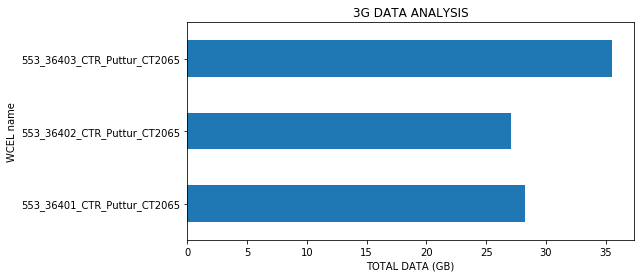

In [129]:
df1 = df3gmod.loc['553_36401_CTR_Puttur_CT2065':'553_36403_CTR_Puttur_CT2065','TOTAL DATA']
plt.figure(figsize=(8, 4))
df1.plot.barh()
plt.title('3G DATA ANALYSIS')
plt.xlabel("TOTAL DATA (GB)")

Text(0.5, 0, 'Voice_DCR')

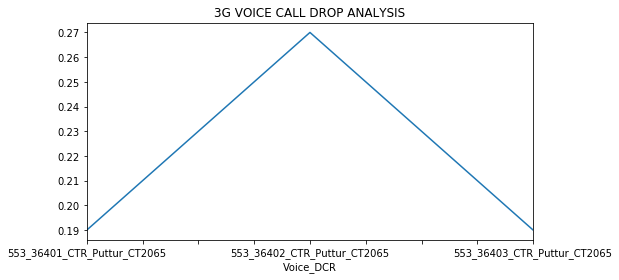

In [130]:
df2 = df3gmod.loc['553_36401_CTR_Puttur_CT2065':'553_36403_CTR_Puttur_CT2065','Voice_DCR']
plt.figure(figsize=(8, 4))
df2.plot.line()
plt.title("3G VOICE CALL DROP ANALYSIS")
plt.xlabel("Voice_DCR")

Text(0.5, 0, 'HSDPA Call Drop Rate (%)')

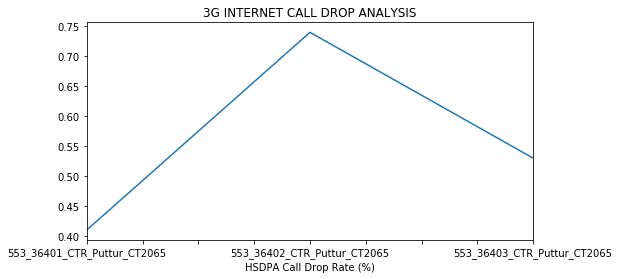

In [131]:
df3 = df3gmod.loc['553_36401_CTR_Puttur_CT2065':'553_36403_CTR_Puttur_CT2065','HSDPA Call Drop Rate (%)']
plt.figure(figsize=(8, 4))
df3.plot.line()
plt.title("3G INTERNET CALL DROP ANALYSIS")
plt.xlabel("HSDPA Call Drop Rate (%)")

## 4. Model Building

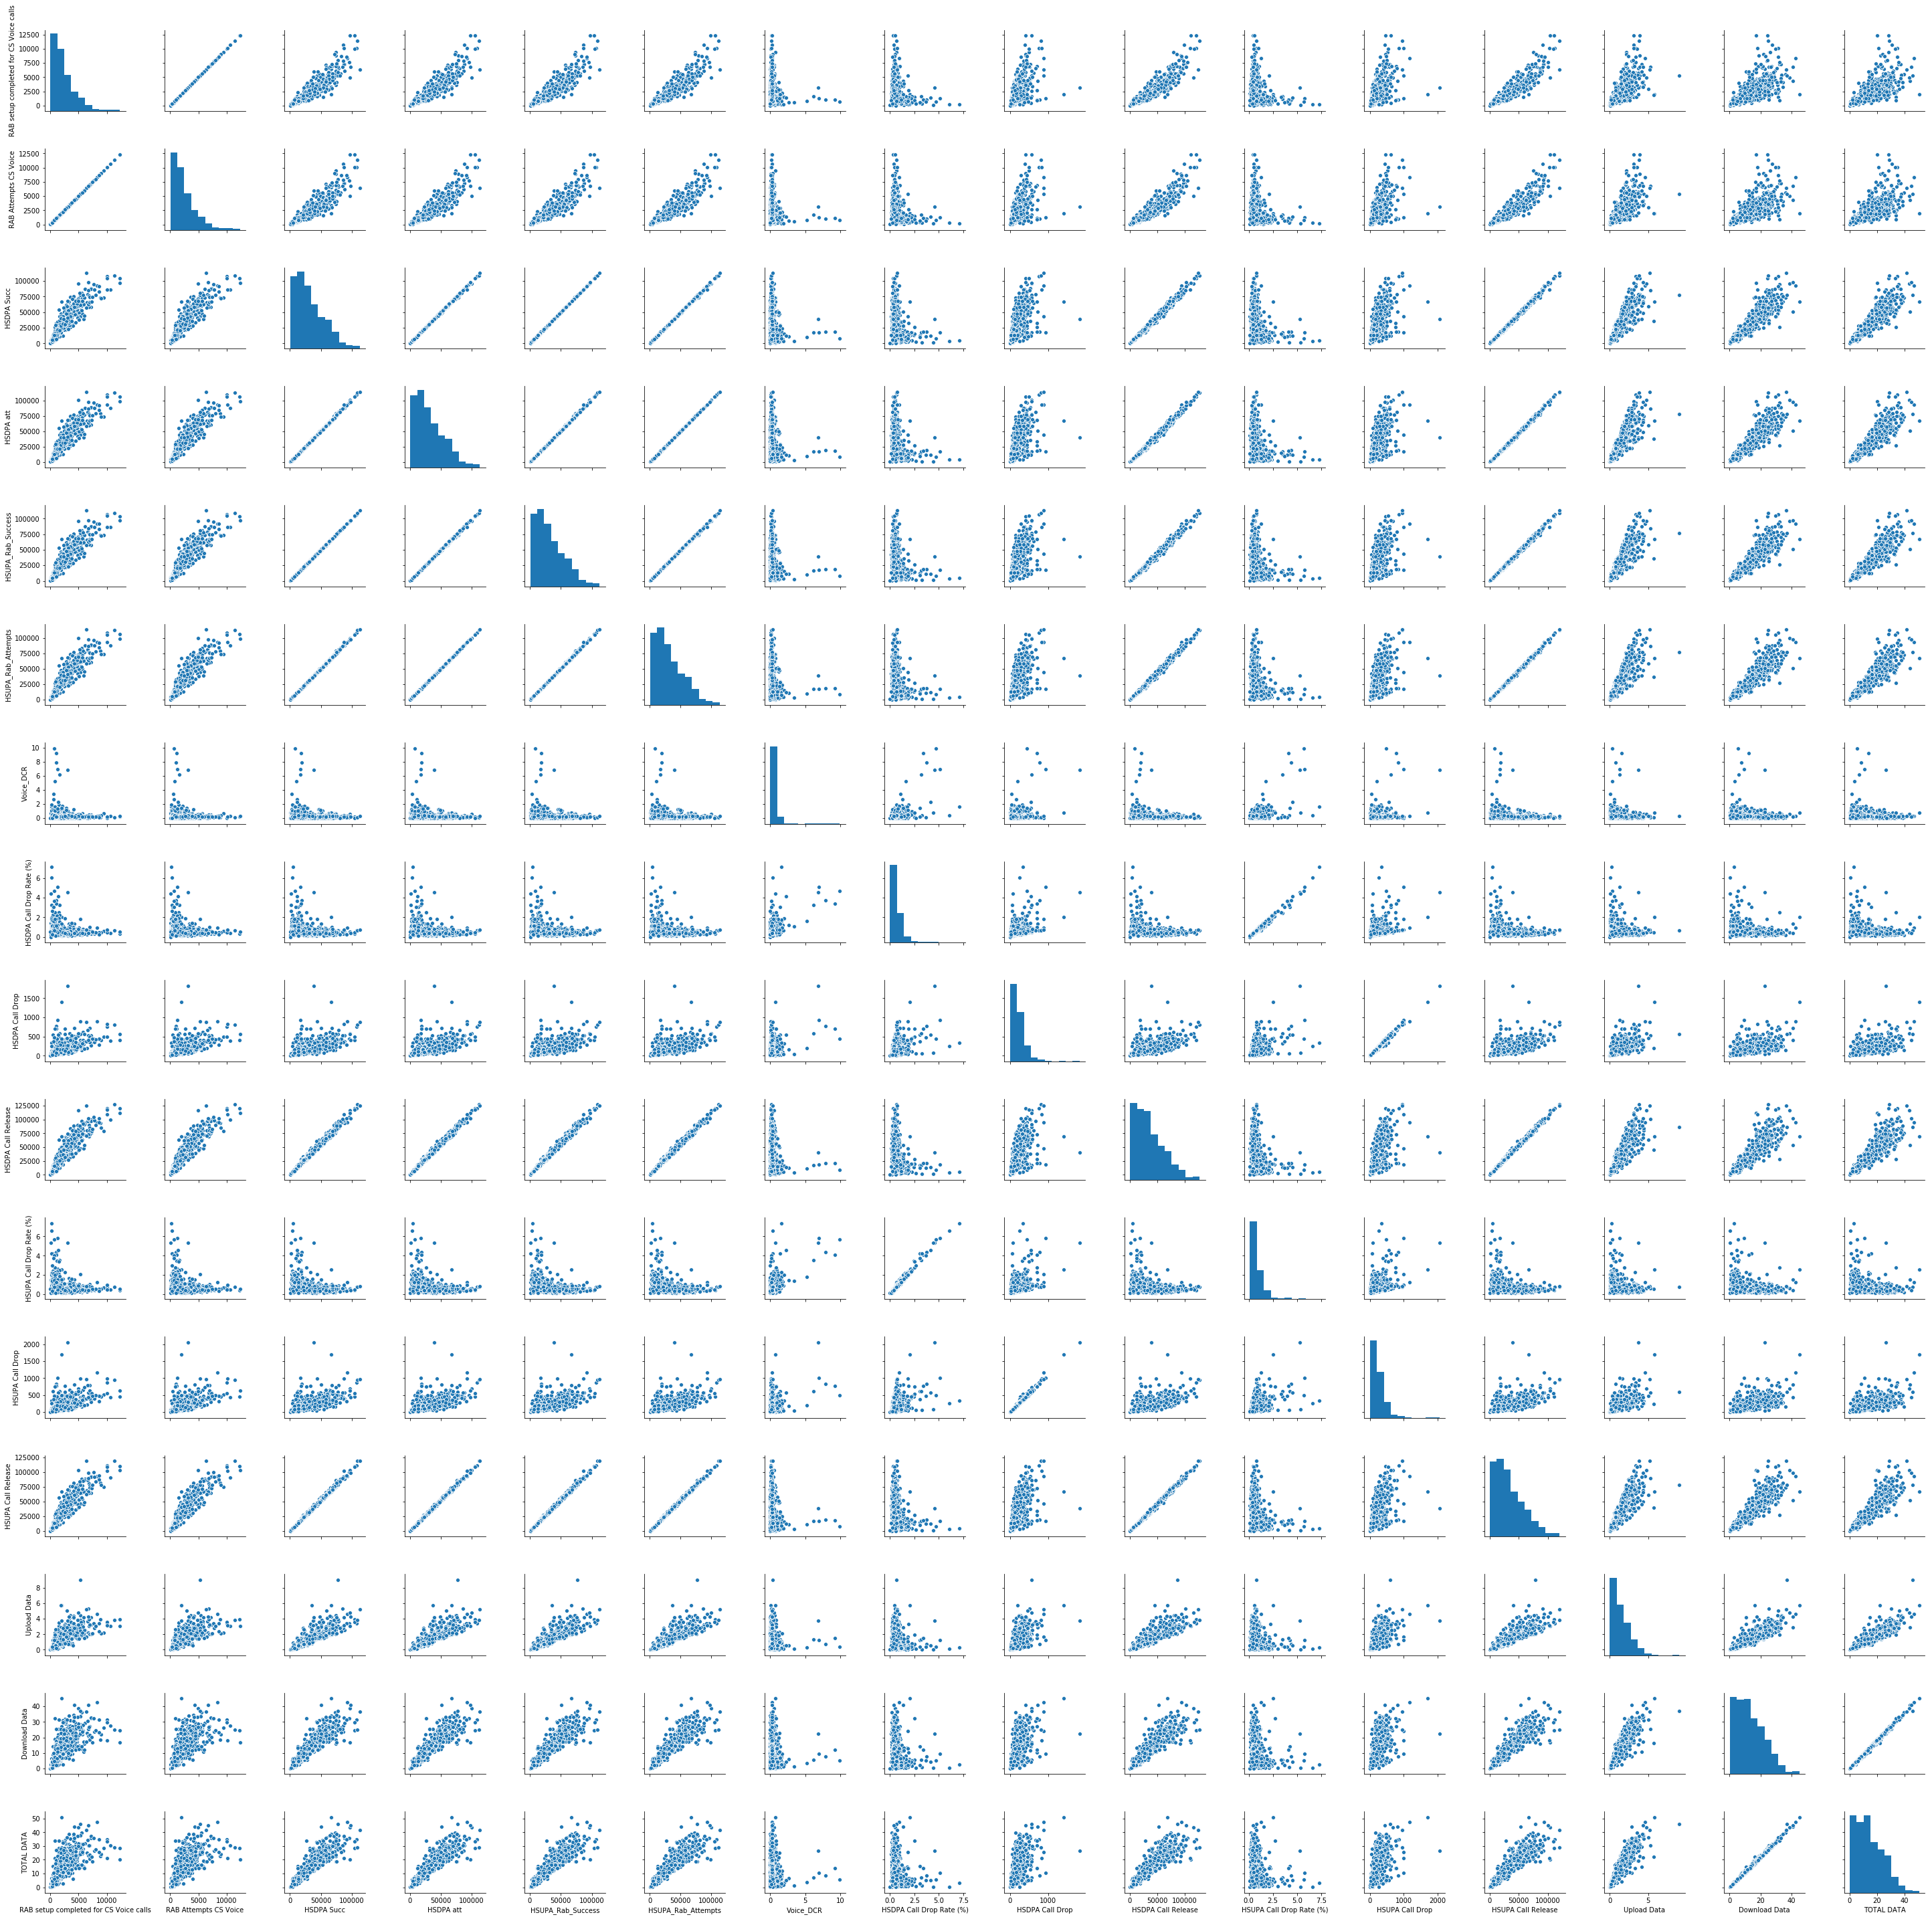

In [132]:
# Visualizing inter-variable relationship in the DF

sns.pairplot(df3gmod)

In [133]:
df3gmod.columns

Index(['WBTS name', 'RAB setup completed for CS Voice calls',
       'RAB Attempts CS Voice', 'HSDPA Succ', 'HSDPA att', 'HSUPA_Rab_Success',
       'HSUPA_Rab_Attempts', 'Voice_DCR', 'HSDPA Call Drop Rate (%)',
       'HSDPA Call Drop', 'HSDPA Call Release', 'HSUPA Call Drop Rate (%)',
       'HSUPA Call Drop', 'HSUPA Call Release', 'Upload Data', 'Download Data',
       'TOTAL DATA'],
      dtype='object')

In [140]:
# choosing input multivariate x-variables x-axis
x = df3gmod[[ 'RAB setup completed for CS Voice calls',
       'RAB Attempts CS Voice', 'HSDPA Succ', 'HSDPA att', 'HSUPA_Rab_Success',
       'HSUPA_Rab_Attempts', 'Voice_DCR', 'HSDPA Call Drop Rate (%)',
       'HSDPA Call Drop', 'HSDPA Call Release', 'HSUPA Call Drop Rate (%)',
       'HSUPA Call Drop', 'HSUPA Call Release', 'Upload Data', 'Download Data',
       ]]
x.head()

,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data
WCEL name,,,,,,,,,,,,,,,
553_36352_Nakkaladinne _CT5501,1856.0,1856.0,27548.0,27706.0,27548.0,27697.0,0.05,0.53,168.0,31908.0,0.62,182.0,29210.0,1.054043,15.351885
553_36353_Nakkaladinne _CT5501,1556.0,1556.0,15812.0,15877.0,15808.0,15872.0,0.13,0.87,159.0,18297.0,1.04,173.0,16602.0,0.446504,5.524326
553_36351_Nakkaladinne _CT5501,1827.0,1827.0,22778.0,22948.0,22778.0,22939.0,0.11,0.62,167.0,27077.0,0.81,199.0,24464.0,1.317627,7.894961
553_36401_CTR_Puttur_CT2065,3026.0,3026.0,53545.0,53906.0,53347.0,53673.0,0.19,0.41,269.0,65344.0,0.52,303.0,58624.0,1.935928,26.312852
553_36402_CTR_Puttur_CT2065,3203.0,3203.0,41549.0,41926.0,41544.0,41849.0,0.27,0.74,395.0,53302.0,0.92,430.0,46988.0,3.236270,23.843105


In [141]:
# choosing target y-variable y-axis

y = df3gmod[['TOTAL DATA']]
y.head()

,TOTAL DATA
WCEL name,
553_36352_Nakkaladinne _CT5501,16.405928
553_36353_Nakkaladinne _CT5501,5.970830
553_36351_Nakkaladinne _CT5501,9.212588
553_36401_CTR_Puttur_CT2065,28.248779
553_36402_CTR_Puttur_CT2065,27.079375


In [142]:
# splitting data set into training set and testing set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)


In [143]:
# importing linear regression

from sklearn.linear_model import LinearRegression

In [144]:
# Instanciate linear regression

lr = LinearRegression()

In [145]:
# Train the model

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 5. Model Evaluation

In [146]:
# finding intercept of linear model

print(lr.intercept_)

[2.92779134e-11]


In [147]:
# finding coefficients of linear model

print(lr.coef_)

[[ 5.69409474e-11 -5.74259459e-11  4.46883011e-12 -5.58693657e-12
  -4.41383318e-12  5.61195842e-12 -4.49089859e-11  1.49480871e-10
  -5.14440701e-12  1.38782705e-13 -2.43092258e-10  6.43727938e-12
  -1.65575011e-13  1.00000000e+00  1.00000000e+00]]


In [148]:
df_coef = pd.DataFrame(lr.coef_,columns = x.columns)
df_coef

,RAB setup completed for CS Voice calls,RAB Attempts CS Voice,HSDPA Succ,HSDPA att,HSUPA_Rab_Success,HSUPA_Rab_Attempts,Voice_DCR,HSDPA Call Drop Rate (%),HSDPA Call Drop,HSDPA Call Release,HSUPA Call Drop Rate (%),HSUPA Call Drop,HSUPA Call Release,Upload Data,Download Data
0,5.694095e-11,-5.742595e-11,4.468830e-12,-5.586937e-12,-4.413833e-12,5.611958e-12,-4.490899e-11,1.494809e-10,-5.144407e-12,1.387827e-13,-2.430923e-10,6.437279e-12,-1.655750e-13,1.0,1.0


In [149]:
# Predictions of Trained LR Model

predictions = lr.predict(x_test)
predictions

array([[22.75086914],
       [ 7.49137695],
       [ 4.90275391],
       [33.86045899],
       [22.64414062],
       [13.30829101],
       [ 2.06483398],
       [13.8319336 ],
       [14.45355469],
       [ 8.02071289],
       [18.30490234],
       [21.21549805],
       [ 6.47425781],
       [19.68743164],
       [34.02450196],
       [ 8.64614258],
       [ 6.31645508],
       [10.13631836],
       [16.35293945],
       [ 1.59039062],
       [ 2.59091797],
       [ 2.21273437],
       [27.69181641],
       [12.76449219],
       [ 6.31949219],
       [24.16155273],
       [10.68570313],
       [ 4.30407227],
       [ 5.39447266],
       [12.87980469],
       [23.27458008],
       [15.01265625],
       [10.7412207 ],
       [21.11313476],
       [ 7.90180664],
       [26.3972168 ],
       [15.69482422],
       [29.66401367],
       [ 6.26134766],
       [10.54610352],
       [21.58300781],
       [23.61795899],
       [23.28514648],
       [ 3.79196289],
       [ 6.59990234],
       [18

In [150]:
# Making a DF of predictions

df = pd.DataFrame(predictions,columns=['predictions'])
df.head()

,predictions
0,22.750869
1,7.491377
2,4.902754
3,33.860459
4,22.644141


In [151]:
# Making a DF of Actuals

y_test.reset_index(drop = True,inplace=True)

y_test.head()

,TOTAL DATA
0,22.750869
1,7.491377
2,4.902754
3,33.860459
4,22.644141


In [154]:
# Renaming columns of y_test

y_test.rename(columns={'TOTAL DATA':'actual'},inplace=True)

In [155]:
# Joining predictions DF and actual DF

df3g = df.join(y_test)
df3g.head()

,predictions,actual
0,22.750869,22.750869
1,7.491377,7.491377
2,4.902754,4.902754
3,33.860459,33.860459
4,22.644141,22.644141


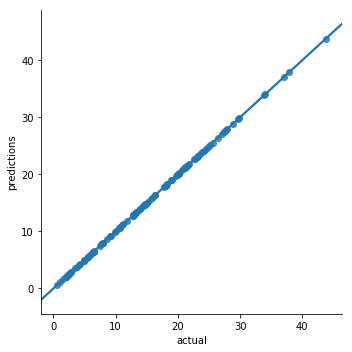

In [156]:
# Visualising predictions and actuals in a lm plot

sns.lmplot(x='actual',y='predictions', data=df3g)

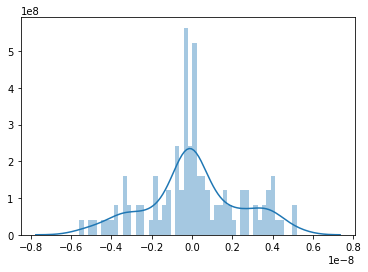

In [157]:
# Visualising Histogram

sns.distplot((y_test-predictions),bins=50);

In [158]:
# Evaluating Model Accuracy by MAE, MSE, RMSE

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.7033111481654457e-09
MSE: 5.293582686697756e-18
RMSE: 2.300778713109489e-09


In [4]:
np.mean(False)

0.0